# TV shows Popularity Predictor (39%)

The goal of this challenge is to create a model that predicts the `popularity` of a movie or TV show

<img src="image.jpg" width=300 />




The dataset contains a list of movies and TV shows with the following characteristics:
- `title`: title of the movie in english
- `original_title`: original title of the movie 
- `duration_min`: duration of the movie in minutes
- `popularity`: popularity of the movie in terms of review scores
- `release_date`: release date
- `description`: short summary of the movie
- `budget`: budget spent to produce the movie in USD
- `revenue`: movie revenue in USD 
- `original_language`: original language 
- `status`: is the movie already released or not
- `number_of_awards_won`: number of awards won for the movie
- `number_of_nominations`: number of nominations
- `has_collection`: if the movie is part of a sequel or not
- `all_genres`: genres that described the movie (can be zero, one or many!) 
- `top_countries`: countries where the movie was produced (can be zero, one or many!) 
- `number_of_top_productions`: number of top production companies that produced the film if any. 
Top production companies includes: Warner Bros, Universal Pictures, Paramount Pictures, Canal+, etc...
- `available_in_english`: whether the movie is available in english or not

## Imports

Run the following cell to load the basic packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nbresult import ChallengeResult

## Data collection

📝 **Load the `movie_popularity.csv` dataset from the provided this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/tv_movies_popularity.csv)**
- First, check and remove the rows that may be complete duplicate from one another (we never know!)
- Then, drop the columns that have too much missing values
- Finally, drop the few remaining rows that have missing values
- Store the result in a `DataFrame` named `data`

In [2]:
# YOUR CODE HERE
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/tv_movies_popularity.csv')

### 🧪 Run the following cell to save your results

In [3]:
data.shape

(6864, 17)

In [4]:
with_duplicates = len(data)

data.drop_duplicates(inplace=True)

print(f'With duplicates: {with_duplicates} --- No duplicates: {len(data)}')

With duplicates: 6864 --- No duplicates: 6464


In [5]:
data.isnull().sum().sort_values(ascending=False) #NaN count for each column
data.isnull().sum().sort_values(ascending=False)/len(data)

revenue                      0.595142
title                        0.000155
original_title               0.000000
number_of_awards_won         0.000000
number_of_top_productions    0.000000
top_countries                0.000000
all_genres                   0.000000
has_collection               0.000000
number_of_nominations        0.000000
original_language            0.000000
status                       0.000000
budget                       0.000000
description                  0.000000
duration_min                 0.000000
release_date                 0.000000
popularity                   0.000000
available_in_english         0.000000
dtype: float64

In [6]:
# The 'revenue' column has 60% missing values. Let's drop it
data.drop(columns=['revenue'], inplace=True)

In [7]:
# The 'title' column has very few null rows. Delete these (there just one row in 'title')
data.dropna(axis=0, inplace=True)

In [8]:
data.shape

(6463, 16)

In [9]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "data_cleaning",
    columns=data.columns,
    cleaning=sum(data.isnull().sum()),
    shape=data.shape)
result.write()

## Baseline model

### The metric

📝 **We want to predict `popularity`: Start by plotting a histogram of the target to visualize it**

In [10]:
data

,original_title,title,popularity,release_date,duration_min,description,budget,original_language,status,number_of_awards_won,number_of_nominations,has_collection,all_genres,top_countries,number_of_top_productions,available_in_english
0,Hot Tub Time Machine 2,Hot Tub Time Machine 2,6.575393,2015-02-20,93.0,"When Lou's shot in the groin, Nick and Jacob d...",14000000,en,Released,0,2,1,Comedy,United States of America,3,True
1,The Princess Diaries 2: Royal Engagement,The Princess Diaries 2: Royal Engagement,8.248895,2004-08-06,113.0,"Now settled in Genovia, Princess Mia faces a n...",40000000,en,Released,1,2,1,"Comedy, Drama, Family, Romance",United States of America,1,True
2,Whiplash,Whiplash,64.299990,2014-10-10,105.0,A promising young drummer enrolls at a cut-thr...,3300000,en,Released,97,145,0,Drama,United States of America,0,True
3,Kahaani,Kahaani,3.174936,2012-03-09,122.0,A pregnant woman's search for her missing husb...,1200000,hi,Released,23,18,0,"Drama, Thriller",India,0,True
4,The Possession,The Possession,7.286477,2012-08-30,92.0,A young girl buys an antique box at a yard sal...,14000000,en,Released,0,6,0,"Horror, Thriller","Canada, United States of America",0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6459,Original Sin,Original Sin,9.970359,2001-08-03,118.0,"A woman, along with her lover, plans to con a ...",42000000,en,Released,0,2,0,Thriller,"France, United States of America",1,True
6460,Without a Paddle,Without a Paddle,6.046516,2004-08-20,95.0,"After their friend dies, three men decide to f...",19000000,en,Released,0,0,1,"Action, Adventure, Comedy, Thriller",United States of America,1,True
6461,The Verdict,The Verdict,9.596883,1982-12-08,129.0,A lawyer sees the chance to salvage his career...,16000000,en,Released,3,14,0,Drama,United States of America,1,True
6462,It Follows,It Follows,20.359336,2015-02-04,100.0,A young woman is followed by an unknown supern...,2000000,en,Released,25,43,0,"Horror, Thriller",United States of America,0,True


547.488298


(-10.0, 552.96318098)

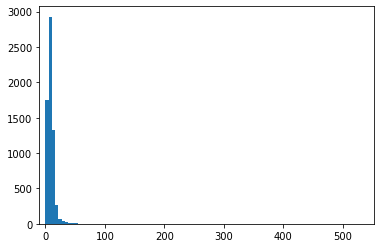

In [11]:
xmax = max(data.popularity) 
print(xmax)
plt.hist(data.popularity, bins=100)
plt.xlim(xmin=-10, xmax=xmax*1.01)

(0.0, 100.0)

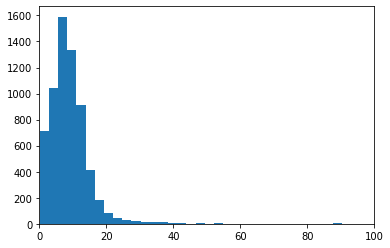

In [12]:
plt.hist(data.popularity, bins=200)
plt.xlim(xmin=0, xmax=100)

(0.0, 60.0)

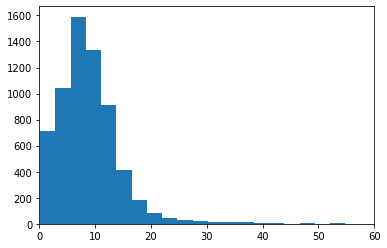

In [13]:
plt.hist(data.popularity, bins=200)
plt.xlim(xmin=0, xmax=60)

📝 **Which sklearn's scoring [metric](https://scikit-learn.org/stable/modules/model_evaluation.html) should we use if we want it to:**

- Be better when greater (i.e. metric_good_model > metric_bad_model)
- Penalize **more** an error between 10 and 20 compared with an error between 110 and 120
- Said otherwise, what matter should be the **relative error ratio**, more than the absolute error difference

Hint: the histogram plotted above should give you some intuition about it

👉 Store its exact [sklearn scoring name](https://scikit-learn.org/stable/modules/model_evaluation.html) as `string` in the variable `scoring` below.

🚨 You must use this metric for the rest of the challenge

In [14]:
# YOUR CODE HERE
scoring = 'neg_mean_squared_log_error'

<details>
    <summary>💡 Hint</summary>
It is around here!
<img src="scores.jpg" width=200 height=400 />
</details>

### X,y

**📝 Define `X` as the features Dataframe (keep all features) and `y` as the target Series.**

In [15]:
# YOUR CODE HERE
X = data.copy()

y = X.popularity
X = X.drop(columns=['popularity'])

### Basic pipeline

📝 **Check unique values per features**

In [16]:
X.nunique()

original_title               6350
title                        6337
release_date                 4320
duration_min                  152
description                  6449
budget                        636
original_language              42
status                          3
number_of_awards_won          124
number_of_nominations         180
has_collection                  2
all_genres                    745
top_countries                 320
number_of_top_productions       5
available_in_english            2
dtype: int64

In this baseline, let's forget about the columns below that are difficult to process

In [17]:
X.dtypes

original_title                object
title                         object
release_date                  object
duration_min                 float64
description                   object
budget                         int64
original_language             object
status                        object
number_of_awards_won           int64
number_of_nominations          int64
has_collection                 int64
all_genres                    object
top_countries                 object
number_of_top_productions      int64
available_in_english            bool
dtype: object

In [18]:
text = ['description', 'original_title', 'title']
dates = ['release_date'] 

X.drop(columns=text, inplace=True)
X.drop(columns=dates, inplace=True)

In [19]:
X.shape

(6463, 11)

In [20]:
y

0        6.575393
1        8.248895
2       64.299990
3        3.174936
4        7.286477
          ...    
6459     9.970359
6460     6.046516
6461     9.596883
6462    20.359336
6463    11.305910
Name: popularity, Length: 6463, dtype: float64

We will simply scale the numerical features and one-hot-encode the categorical ones remaining

📝 **Prepare 2 `list`s of features names as `str`**:
- `numerical` which contains **only** numerical features
- `categorical` which contains **only** categorical features (exept text and dates above)

In [21]:
# YOUR CODE HERE
from sklearn.compose import make_column_selector

# numerical = make_column_selector(dtype_include=['float64', 'int64'])
# categorical = make_column_selector(dtype_include=['object', 'bool'])
numerical = ['duration_min', 'budget', 'number_of_awards_won', 'number_of_nominations', 'has_collection', 'number_of_top_productions']
categorical = ['original_language', 'status', 'all_genres', 'top_countries', 'available_in_english']

### Pipelining

You are going to build a basic pipeline made of a basic preprocessing and a trees-based model of your choice.

#### Preprocessing pipeline

**📝 Create a basic preprocessing pipeline for the 2 types of features above:**
- It should scale the `numerical` features
- one-hot-encode the `categorical` and `boolean` features
- drop the others
- Store your pipeline in a `basic_preprocessing` variable

In [22]:
# Execute this cell to enable a nice display for your pipelines
from sklearn import set_config; set_config(display='diagram')

In [23]:
# YOUR CODE HERE
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#More resilient to outliers than StandardScaler
num_transformer = RobustScaler()

# Encode categorical variables
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)


basic_preprocessing = ColumnTransformer([
    ('num_transformer', num_transformer, make_column_selector(dtype_include=['float64', 'int64'])),
    ('cat_transformer', cat_transformer, make_column_selector(dtype_include=['object', 'bool']))
    # ('num_transformer', num_transformer, numerical),
    # ('cat_transformer', cat_transformer, categorical)
], remainder='drop')

In [24]:
basic_preprocessing

ColumnTransformer(transformers=[('num_transformer', RobustScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0c09ac2670>),
                                ('cat_transformer',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0c09ac2df0>)])

**📝 Encode the features and store the result in the variable `X_basic_preprocessing`.**

In [25]:
# YOUR CODE HERE
X_basic_preprocessing = basic_preprocessing.fit_transform(X)

In [26]:
pd.DataFrame(X_basic_preprocessing)

,0,1,2,3,4,5,6,7,8,9,...,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117
0,-0.500000,0.093684,-0.333333,-0.250000,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.333333,0.905609,-0.166667,-0.250000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.000000,-0.240455,15.833333,11.666667,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.708333,-0.306033,3.500000,1.083333,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.541667,0.093684,-0.333333,0.083333,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,0.541667,0.968065,-0.333333,-0.250000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6459,-0.416667,0.249823,-0.333333,-0.416667,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6460,1.000000,0.156139,0.166667,0.750000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6461,-0.208333,-0.281051,3.833333,3.166667,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


**❓ How many features has been generated by the preprocessing? What do you think about this number?**

> YOUR ANSWER HERE: 
Preprocessing has created a total of 42+3+745+320+2 = 1112 (!!!) columns. This is how One-Hot encoding works and it was expected. One column is added for each discreet value of the categorical features.

In [27]:
#
#
# I had a bug with the pipeline that I could not fix. Follows manual preprocessing/transformation
#
#

#Reset X
# X = data.copy()
# X = X.drop(columns=['popularity'])
# X.drop(columns=text, inplace=True)
# X.drop(columns=dates, inplace=True)

# #numerical columns
# for column in numerical:
#     num_transformer.fit(X[[column]])
#     X[column] = num_transformer.transform(X[[column]])

# #categorical columns
# transformed_columns = []
# for column in categorical:
#     cat_transformer.fit(X[[column]])
#     transformed_columns.append(cat_transformer.transform(X[[column]]))

# X.drop(columns=categorical, inplace=True)
# for column in transformed_columns:
#     X = pd.concat(objs=[X, pd.DataFrame(column)], axis=1, ignore_index=True)
    
# X_basic_preprocessing = X

# X_basic_preprocessing.drop_duplicates(inplace=True)
# X_basic_preprocessing.dropna(axis=0, inplace=True)

# X_basic_preprocessing.drop(X_basic_preprocessing.tail(1).index, inplace=True)


In [28]:
X_basic_preprocessing.shape

(6463, 1118)

#### Modeling pipeline

Let's add a model to our pipe. With so many features one-hot-encoded, we **need a model which can act as a feature selector**

👉 A linear model regularized with L1 penalty is a good starting point.


**📝 Create a `basic_pipeline` which encapsulate the `basic_preprocessing` pipeline + a linear model with a L1 penalty**

- store the resulting pipeline as `basic_pipeline`
- don't fine-tune it

<details>
    <summary>Hints</summary>

Choose your model from the list [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

</details>

In [29]:
# YOUR CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

basic_pipeline = Pipeline([
    ('preprocessing', basic_preprocessing),
    ('linear_regression', Lasso())])

In [30]:
basic_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  RobustScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0c09ac2670>),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0c09ac2df0>)])),
                ('linear_regression', Lasso())])

### Cross-validated baseline

**📝 Perform a cross-validated evaluation of your baseline model using the metric you defined above. Store the results of this evaluation as an `array` of floating scores in the `basic_scores` variable.**

In [31]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X_basic_preprocessing, y, test_size=0.3, random_state=0)


#
#
# Redifne basic_pipeline to continue with exercise without errors. Basic prepocessing is done manually above
#
#
basic_pipeline = Pipeline([
    # ('preprocessing', basic_preprocessing),
    ('linear_regression', Lasso())
])

# basic_scores = cross_val_score(basic_pipeline, X_train, y_train, cv=5, scoring=scoring)
basic_scores = cross_val_score(basic_pipeline, X_basic_preprocessing, y, cv=10, scoring=scoring)

In [32]:
basic_scores

array([-0.3276117 , -0.27239429, -0.34506918, -0.2985009 , -0.27504802,
       -0.34957402, -0.30346164, -0.30114095, -0.34643136, -0.31919065])

### 🧪 Save your results

Run the following cell to save your results

In [33]:
ChallengeResult(
    'baseline',
    metric=scoring,
    features=[categorical,numerical],
    preproc=basic_preprocessing,
    preproc_shape=X_basic_preprocessing.shape,
    pipe=basic_pipeline,
    scores=basic_scores
).write()

## Feature engineering

### Time Features


👉 Let's try to improve performance using the feature `release_date`, and especially its `month` and `year`.

ℹ️ If you want to skip this section, you can move directly to the next one: _Advanced categorical features_.

**📝 Complete the custom transformer `TimeFeaturesExtractor` below**

Running
```python
TimeFeaturesExtractor().fit_transform(X[['release_date']])
``` 
should return something like

|    |   month |   year |
|---:|--------:|-------:|
|  0 |       2 |   2015 |
|  1 |       8 |   2004 |
|  2 |      10 |   2014 |
|  3 |       3 |   2012 |
|  4 |       8 |   2012 |


In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

class TimeFeaturesExtractor(BaseEstimator, TransformerMixin):
    """Extract the 2 time features from a date"""
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        """
        Params:
        X: DataFrame
        y: Series
        """
        time_features = X
        time_features['month'] = pd.to_datetime(X['release_date']).dt.month
        time_features['year'] = pd.to_datetime(X['release_date']).dt.year
        
        time_features.drop(columns=['release_date'], inplace=True)
        
        # Returns a DataFrame with 2 columns containing the time features as integers extracted from the release_date.
        return time_features

In [35]:
# Basic encoding above removed feature names. Reset X to get them back
X = data.copy()
X = X.drop(columns=['popularity'])
X.drop(columns=text, inplace=True)

# repeat basic processing, but leave out columns that will be processed by custom transformers below
numerical = ['duration_min', 'budget', 'number_of_awards_won', 'number_of_nominations', 'has_collection', 'number_of_top_productions']
categorical = ['original_language', 'status', 'available_in_english']
basic_preprocessing = ColumnTransformer([
    ('num_transformer', num_transformer, numerical),
    ('cat_transformer', cat_transformer, categorical)
], remainder='passthrough')

In [36]:
basic_preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_transformer', RobustScaler(),
                                 ['duration_min', 'budget',
                                  'number_of_awards_won',
                                  'number_of_nominations', 'has_collection',
                                  'number_of_top_productions']),
                                ('cat_transformer',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['original_language', 'status',
                                  'available_in_english'])])

In [37]:
X_basic_preprocessing = pd.DataFrame(basic_preprocessing.fit_transform(X))

In [38]:
X_basic_preprocessing.rename(
    columns={
        53: "release_date", 
        54: "all_genres",
        55: "top_countries"}, 
    inplace=True
)

In [39]:
X = X_basic_preprocessing.copy()

In [40]:
X_time_features = TimeFeaturesExtractor().fit_transform(X[['release_date']])

<ipython-input-34-9c2c02076789>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_features['month'] = pd.to_datetime(X['release_date']).dt.month
<ipython-input-34-9c2c02076789>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_features['year'] = pd.to_datetime(X['release_date']).dt.year
/home/primitive/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

In [41]:
X['month'] = X_time_features['month']
X['year'] = X_time_features['year']

X.drop(columns=['release_date'], inplace=True)

We still have 2 problems to solve
- `month` is cyclical: 12 should be as close to 1 as to 11, right? 
- `year` is not scaled

**📝 Build a final custom transformer `CyclicalEncoder` so that**

Running
```python
CyclicalEncoder().fit_transform(X_time_features)
``` 
should return something like this

|    |    month_cos |   month_sin |      year |
|---:|-------------:|------------:|----------:|
|  0 |  0.5         |    0.866025 | 0.0466039 |
|  1 | -0.5         |   -0.866025 | 0.0411502 |
|  2 |  0.5         |   -0.866025 | 0.0461081 |
|  3 |  6.12323e-17 |    1        | 0.0451165 |
|  4 | -0.5         |   -0.866025 | 0.0451165 |

With the cyclical encoding is done as below
- `month_cos = np.cos(2 * math.pi / 12 * X[['month']]) `
- `month_sin = np.sin(2 * math.pi / 12 * X[['month']]) `

And the `year` begin min-max scaled

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
import math

class CyclicalEncoder(BaseEstimator, TransformerMixin):
    """
    Encode a cyclical feature
    """
 
    def fit(self, X, y=None):
        """
        Compute here what you need for the transform phase and store it as instance variable
        """
        return self

    def transform(self, X, y=None):
        """
        Computes and returns the final DataFrame
        """
        
        scaler = StandardScaler()
        scaler.fit(X[['year']], y=None)
        
        cyclical_encoded = X
        cyclical_encoded['month_cos'] = np.cos(2 * math.pi / 12 * X[['month']])
        cyclical_encoded['month_sin'] = np.sin(2 * math.pi / 12 * X[['month']])
        cyclical_encoded['year'] = scaler.transform(cyclical_encoded[['year']])
        
        cyclical_encoded.drop(columns=['month'], inplace=True)
                
        return cyclical_encoded

In [43]:
# Try your transformer and save your new features here
X_time_cyclical = CyclicalEncoder().fit_transform(X_time_features)
# X_time_cyclical.head()

<ipython-input-42-03b42a32726d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyclical_encoded['month_cos'] = np.cos(2 * math.pi / 12 * X[['month']])
<ipython-input-42-03b42a32726d>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyclical_encoded['month_sin'] = np.sin(2 * math.pi / 12 * X[['month']])
<ipython-input-42-03b42a32726d>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [44]:
X['year'] = X_time_cyclical['year']
X['month_cos'] = X_time_cyclical['month_cos']
X['month_sin'] = X_time_cyclical['month_sin']

X.drop(columns=['month'], inplace=True)

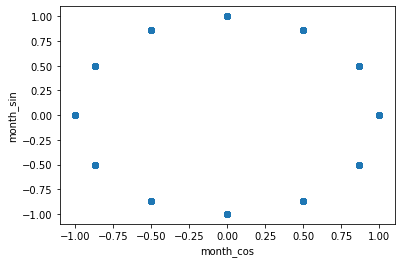

In [45]:
# Check that this form a circle with 12 points
plt.scatter(X_time_cyclical['month_cos'],
            X_time_cyclical['month_sin'])
plt.xlabel("month_cos"); plt.ylabel("month_sin");

**📝 Enhance your `basic_pipeline` with a new preprocessing including both `TimeFeaturesExtractor` and `CyclicalFeatureExtractor`:**

- Just use `TimeFeatureExtractor` if you haven't had time to do the `Cyclical` one
- Store this new pipeline as `time_pipeline`
- Keep same estimator for now

In [47]:
# YOUR CODE HERE
time_pipeline = Pipeline([
    ('preprocessing', basic_preprocessing),
    ('time_features_extractor', TimeFeaturesExtractor()),
    ('cyclical_feature_extractor', CyclicalEncoder()),
    ('linear_regression', Lasso())
])

In [48]:
time_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  RobustScaler(),
                                                  ['duration_min', 'budget',
                                                   'number_of_awards_won',
                                                   'number_of_nominations',
                                                   'has_collection',
                                                   'number_of_top_productions']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['original_language',
                                                   'status',
                                                   'available_in_english'])])),
                ('time_features_extractor', TimeFeaturesExtractor()),
                ('cyclical_feature_extractor', CyclicalEncoder()),
                ('linear_regression', Lasso())])

### Advanced categorical encoder to reduce the number of features

ℹ️ Most of it has already been coded for you and it shouldn't take long. Still if you want to skip it and move to the next section: _Model Tuning_

👉 We need to reduce the number of features to one-hot-encode, which arise from the high cardinality of `all_genres` and `top_countries`

In [ ]:
# #Reset X
# X = data.copy()
# X = X.drop(columns=['popularity'])
# X.drop(columns=text, inplace=True)
# X.drop(columns=dates, inplace=True)

# X[['all_genres', 'top_countries']].nunique()

👇 Both share a common pattern: there can be more than 1 country and more than 1 genre per movie.

In [49]:
X[['all_genres', 'top_countries']].tail()

,all_genres,top_countries
6458,Thriller,"France, United States of America"
6459,"Action, Adventure, Comedy, Thriller",United States of America
6460,Drama,United States of America
6461,"Horror, Thriller",United States of America
6462,Drama,France


👉 Run the cell below where we have coded for you a custom transformer `CustomGenreAndCountryEncoder` which: 
- Select the 10 most frequent genres and the 5 most frequent countries
- Encode `all_genres` into 10 One Hot Encoded features
- Encode `top_countries` into 5 One Hot Encoded features

In [50]:
from collections import Counter
from sklearn.base import BaseEstimator, TransformerMixin

class CustomGenreAndCountryEncoder(BaseEstimator, TransformerMixin):
    """
    Encoding the all_genres and top_companies features which are multi-categorical :
    a movie has several possible genres and countries of productions!
    """

    def __init__(self):
        pass

    def fit(self, X, y=None):
        """
        compute top genres and top countries of productions from all_genres and top_countries features
        """

        # compute top 10 genres       
        list_of_genres = list(X['all_genres'].apply(lambda x: [i.strip() for i in x.split(",")] if x != [''] else []).values)
        top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(10)]

        # save top_genres in dedicated instance variable
        self.top_genres = top_genres
        
         # compute top 5 countries       
        list_of_countries = list(X['top_countries'].apply(lambda x: [i.strip() for i in x.split(",")] if x != [''] else []).values)
        top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(5)]

        # save top_countries in dedicated instance variable
        self.top_countries = top_countries

        return self

    def transform(self, X, y=None):
        """
        encoding genre and country
        """
        X_new = X.copy()
        for genre in self.top_genres:
            X_new['genre_' + genre] = X_new['all_genres'].apply(lambda x: 1 if genre in x else 0)
        X_new = X_new.drop(columns=["all_genres"])
        for country in self.top_countries:
            X_new['country_' + country] = X_new['top_countries'].apply(lambda x: 1 if country in x else 0)
        X_new = X_new.drop(columns=["top_countries"])
        return X_new

In [51]:
# Check it out
X_custom = CustomGenreAndCountryEncoder().fit_transform(X[['all_genres', 'top_countries']])
print(X_custom.shape)
X_custom.head()

(6463, 15)


,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Adventure,genre_Crime,genre_Science Fiction,genre_Horror,genre_Family,country_United States of America,country_United Kingdom,country_France,country_Germany,country_Canada
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1


**📝 Compute your `final_pipeline` by integrating all these transformers** (or all those you have coded)

- `CustomGenreAndCountryEncoder`
- `TimeFeaturesExtractor`
- `CyclicalFeatureExtractor`

In [ ]:
# YOUR CODE HERE
final_pipeline = Pipeline([
    ('preprocessing', basic_preprocessing),
    ('time_features_extractor', TimeFeaturesExtractor()),
    ('cyclical_feature_extractor', CyclicalEncoder()),
    ('custom_genre_and_country', CustomGenreAndCountryEncoder),
    ('linear_regression', Lasso())
])

In [ ]:
final_pipeline

📝 **Compute and store its cross validated scores as `final_scores` array of floats**

- It does not necessarily improve the performance before we can try-out doing model tuning
- However, with a now limited number of features, we will be able to train more complex models in next section (ensemble...)

In [ ]:
final_scores = cross_val_score(final_pipeline, X_train, y_train, cv=5, scoring=scoring)

### 🧪 Save your result

Run the following cell to save your results.

In [ ]:
ChallengeResult(
    'feature_engineering',
    X_time_features=X_time_features,
    X_time_cyclical= X_time_cyclical,
    time_pipeline=time_pipeline,
    final_pipeline=final_pipeline,
    final_scores=final_scores
).write()

# Hint: Try restarting your notebook if you obtain an error about saving a custom encoder

## Model tuning

### Random Forest

📝 **Change the estimator of your `final_pipeline` by a Random Forest and checkout your new cross-validated score**

In [ ]:
# YOUR CODE HERE

### Best hyperparameters quest



**📝 Fine tune your model to try to get the best performance in the minimum amount of time!**

- Store the result of your search inside the `search` variable.
- Store your 5 cross-validated scores inside `best_scores` array of floats

In [ ]:
# YOUR CODE HERE

**📝 Re-train your best pipeline on the whole (X,y) dataset**
- Store the trained pipeline inside the `best_pipeline` variable

In [ ]:
# YOUR CODE HERE

### Prediction

Now you have your model tuned with the best hyperparameters, you are ready for a prediction.

Here is a famous TV show released in 2017:

```python
dict(
        original_title=str("La Casa de Papel"),
        title=str("Money Heist"), 
        release_date= pd.to_datetime(["2017-05-02"]), 
        duration_min=float(50),
        description=str("An unusual group of robbers attempt to carry out the most perfect robbery"), 
        budget=float(3_000_000), 
        original_language =str("es"), 
        status=str("Released"),
        number_of_awards_won =int(2), 
        number_of_nominations=int(5), 
        has_collection=int(1),
        all_genres=str("Action, Crime, Mystery"), 
        top_countries=str("Spain, France, United States of America"), 
        number_of_top_productions=int('1'),
        available_in_english=bool('True') 
)
```

**📝 Compute the predicted popularity of this TV show and store it into the `popularity` variable as a floating number.**

In [ ]:
# YOUR CODE HERE

In [ ]:
# YOUR CODE HERE

### 🧪 Save your results

Run the following cell to save your results.

In [ ]:
ChallengeResult(
    "model_tuning",
    search=search,
    best_pipeline=best_pipeline,
    best_scores = best_scores,
    popularity=popularity
).write()

## API 

Time to put a pipeline in production!

👉 Go to https://github.com/lewagon/data-certification-api-movies/ and follow instructions

**This final part is independent from the above notebook**